# Convolution using the OpenCV Library
---

Author: F.Kesel, 19.11.24

In this Jupyter Notebook the convolution of an 8 Bit gray scale image is calculated.

In the following cell the necessary libraries are imported and the filter matrix or kernel is defined for a 3x3 2D filter, which will be used for convolution afterwards. With the identity kernel the resulting image should be the same as the input image. The Laplace and Sobel filter calculates a resulting image, which shows the edges of the input image. The data format for the filter coefficients is 16 Bit signed, as used by the corresponding Xilinx OpenCV function. 

There are several input images available in the directory `../images`, with different sizes. All images are gray scale images coded with 8 Bit.

The image is read into a numpy array (`numpy.ndarray`) . Check that the size matches the expected size and the that the data type is `uint8`. 

In [7]:
# Import the necessary libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Define filter kernel (data format is 16 Bit integer)
#filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.int16) ##Identity 
filter = np.array([(0,1,0), (1,-4,1), (0,1,0)], dtype=np.int16) #Laplace Filter (Edge detection)
#filter = np.array([(1,0,-1), (2,0,-2), (1,0,-1)], dtype=np.int16) #Sobel Filter (Edge detection)

# Image files for parallel execution in the IP core:
# Small image 64x64
#image_file_name = "../images/image_64x64.bmp"
# Large image 656x880
#image_file_name = "../images/image_880x656.bmp"
# HD image 1080x1920
image_file_name = "../images/image_1920x1080.bmp"

# Read input image
img = cv.imread(image_file_name, cv.IMREAD_GRAYSCALE) #Read image in grayscale
print("Image shape (height, width):", img.shape)
print("Data type: ", img.dtype)


Image shape (height, width): (1080, 1920)
Data type:  uint8


In the next cell the 2D filter is calculated, which is basically a 2D convolution:
* Syntax: filter2D (src, ddepth, kernel)
* Parameters:  
    * Src – The source image to apply the filter on.
    * Ddepth – Depth of the output image [ -1 will give the output image depth the same as the input image]
    * Kernel – The 2d matrix we want the image to convolve with.
    * borderType - Defines the values at the border of the image (must be the same as in HLS!)
* The filter returns a numpy array with the same size and data type.

Image shape of resulting image: (1080, 1920)
Data type:  uint8


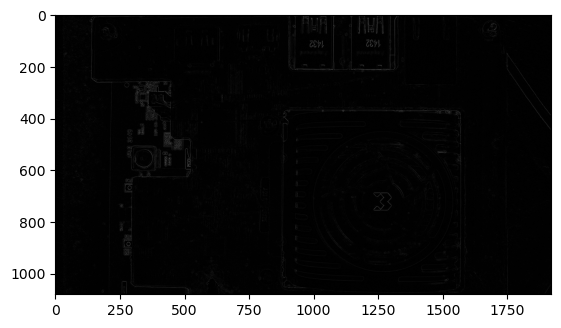

In [8]:
# Calculate the 2D filter, i.e. convolution
ref = cv.filter2D(src=img, ddepth=-1, kernel=filter, borderType=cv.BORDER_CONSTANT)

print("Image shape of resulting image:", ref.shape)
print("Data type: ", ref.dtype)

# Show the image with matplotlib
plt.imshow(ref, cmap='gray')
plt.show()